In [1]:
%load_ext sagemaker_studio_analytics_extension.magics
%sm_analytics emr connect --verify-certificate False --cluster-id j-1DTEH1A9FQ8AB --auth-type None --language python  

Successfully read emr cluster(j-1DTEH1A9FQ8AB) details
Initiating EMR connection..
Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
0,application_1732094423681_0001,pyspark,idle,Link,Link,None,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.
{"namespace": "sagemaker-analytics", "cluster_id": "j-1DTEH1A9FQ8AB", "error_message": null, "success": true, "service": "emr", "operation": "connect"}


In [2]:
%%configure -f

{
    "conf":{
        "spark.yarn.appMasterEnv.PYSPARK_PYTHON": "./environment/bin/python",
        "spark.yarn.appMasterEnv.PYSPARK_DRIVER_PYTHON": "./environment/bin/python",
        "spark.executorEnv.PYSPARK_PYTHON": "./environment/bin/python",
        "spark.yarn.dist.archives":"s3://emr-test-117019135262/xldemo/archives/conda-py39-env.tar.gz#environment"
    }
}

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
1,application_1732094423681_0002,pyspark,idle,Link,Link,None,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
1,application_1732094423681_0002,pyspark,idle,Link,Link,None,✔


In [4]:
import sys
print(sys.version)
print(sys.executable)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

3.9.20 | packaged by conda-forge | (main, Sep 30 2024, 17:49:10) 
[GCC 13.3.0]
/mnt/yarn/usercache/livy/appcache/application_1732094423681_0002/container_1732094423681_0002_01_000001/environment/bin/python

In [5]:
%%info

ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
1,application_1732094423681_0002,pyspark,idle,Link,Link,None,✔


In [ ]:
import logging
logger = logging.getLogger()

# logging set up 
log_format = logging.Formatter('%(asctime)-15s %(levelname)-2s %(message)s')
sh = logging.StreamHandler()
sh.setFormatter(log_format)

# add the handler
logger.addHandler(sh)
logger.setLevel(logging.INFO)

## Start notebook

In [5]:
df_examples = spark.read.parquet('s3://data-apsoutheast3-117019135262/esci-dataset/shopping_queries_dataset_examples.parquet')
df_products = spark.read.parquet('s3://data-apsoutheast3-117019135262/esci-dataset/shopping_queries_dataset_products.parquet')

df = df_examples.join(df_products, on=['product_locale', 'product_id'])

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [6]:
# Total columns
print(f'Total Columns: {len(df.dtypes)}')
df.printSchema()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Columns: 15
root
 |-- product_locale: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- example_id: long (nullable = true)
 |-- query: string (nullable = true)
 |-- query_id: long (nullable = true)
 |-- esci_label: string (nullable = true)
 |-- small_version: long (nullable = true)
 |-- large_version: long (nullable = true)
 |-- split: string (nullable = true)
 |-- __index_level_0__: long (nullable = true)
 |-- product_title: string (nullable = true)
 |-- product_description: string (nullable = true)
 |-- product_bullet_point: string (nullable = true)
 |-- product_brand: string (nullable = true)
 |-- product_color: string (nullable = true)

### Run plotting in the EMR cluster

In [7]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and you've already created num_of_products_by_locale
num_of_products_by_locale = df.groupBy('product_locale').count().orderBy('product_locale').toPandas()

plt.figure(figsize=(8, 6))
bars = plt.bar(range(len(num_of_products_by_locale)), num_of_products_by_locale['count'], color='#bc5090')
plt.title('Number of products by locale')
plt.xlabel('Locale')
plt.ylabel('Number of products')

# Set the x-tick labels to the locale values
plt.xticks(range(len(num_of_products_by_locale)), num_of_products_by_locale['product_locale'], rotation=70)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()

plt.tight_layout()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### Then, display it in your notebook

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

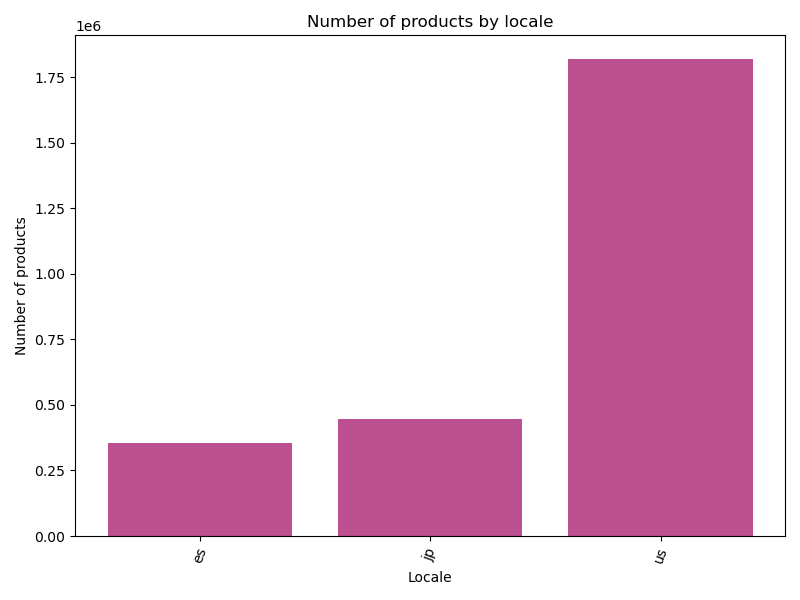

In [8]:
%matplot plt

## Run another plot in EMR Cluster

In [9]:
# Distribution of ESCI labels
esci_label_dist = df.groupBy('esci_label').count().orderBy('count').toPandas()

plt.clf()
esci_label_dist.plot(kind='pie', labels='esci_label',y='count', colors=['#00876c', '#89c079', '#fff392', '#fc9e5a'], figsize=(8,6))
plt.title('Distribution of ESCI Labels')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Text(0.5, 1.0, 'Distribution of ESCI Labels')

### Then, display it in your notebook

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

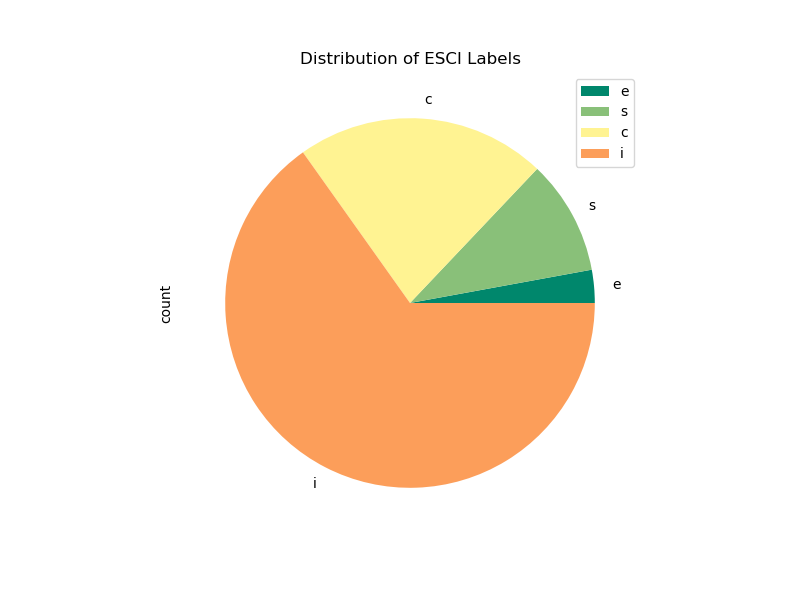

In [10]:
%matplot plt

### Test Error Message

Without logger

In [ ]:

# Distribution of ESCI labels
esci_label_dist = df.groupBy('esci_label').count().orderBy('count').toPandas()

plt.clf()
esci_label_dist.plot(kind='pie', labels='esci_label',y='count', colors=['#00876c', '#89c079', '#fff392', '#fc9e5a'], figsize=(8,6))
plat.title('Distribution of ESCI Labels')


With logger

In [ ]:
try:
    # Distribution of ESCI labels
    esci_label_dist = df.groupBy('esci_label').count().orderBy('count').toPandas()
    
    plt.clf()
    esci_label_dist.plot(kind='pie', labels='esci_label',y='count', colors=['#00876c', '#89c079', '#fff392', '#fc9e5a'], figsize=(8,6))
    plat.title('Distribution of ESCI Labels')
except Exception as e: 
    logger.error(e)

## Stop

In [ ]:
%%spark stop